# K Nearest Neighbors (KNN)

# Introduction

K Nearest Neighbors (KNN) is a simple supervised learning algorithm, and it can be used to solve both classification and regression problems.

### Input

* K closest training data in the dataset. 

### Output

* In KNN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. 

* In kNN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.


## How does KNN Algorithm work?

* **Step 1: Choose the number k of the neighbors**

    - K is the number of nearest neighbors, which is the core deciding factor. 
    
    - In general, K should be odds for classification to make sure a class can be voted out.
    
    - Choosing a small value of K would lead to unstable decision boundaries.
    
    - K should be optimize (see Step 4 below).

* **Step 2: Calculate the distance from the new point to every point in the training set**

    - This step is computational expensive.

    - The formulas to calculate the distance (Euclidean distance):
        - Two-Dimention formular:
        $$d(p, q) = \sqrt {(p_1-q_1)^2+(p_2-q_2)^2}$$
        - n-Dimention formular:
        $$d(p, q) = \sqrt {(p_1-q_1)^2+(p_2-q_2)^2+...+(p_n-q_n)^2}=\sqrt {\sum_{i=1}^{n}(p_i-q_i)^2}$$

* **Step 3: Sort the distances from smallest to largest, pick the first K data points, and**
    - (for Classification:) **predict the majority label of the k closest points**
    - (for Regression:) **predict the average label for the K closest points**

* **Step 4: Evaluation of the performance and optimize K**
    - Derive a plot between error rate and K, and then choose the K with minimun error rate.
    - The error is:
    $$E = \frac {1}{M} \sum_{i=1}^{M} \left(y_i \ne \hat {y_i} \right)$$


---

# Implement

In the following of this notebook, I will implement *K Nearest Neighbors (KNN)* to classify Hawk species using the [Hawks dataset](https://rdrr.io/rforge/Stat2Data/man/Hawks.html).


### About the dataset

The Hawks dataset has 908 cases and 19 columns. The data were collected by the students and faculty from Cornell College at Lake MacBride near Iowa City, Iowa. There are three different species of hawks: Red-tailed, Sharp-shinned, and Cooper's hawks.

* [Red-tailed hawk](https://en.wikipedia.org/wiki/Red-tailed_hawk)

<img src="Image/red-tail-hawk.jpeg" alt="Drawing" style="width: 500px;"/>
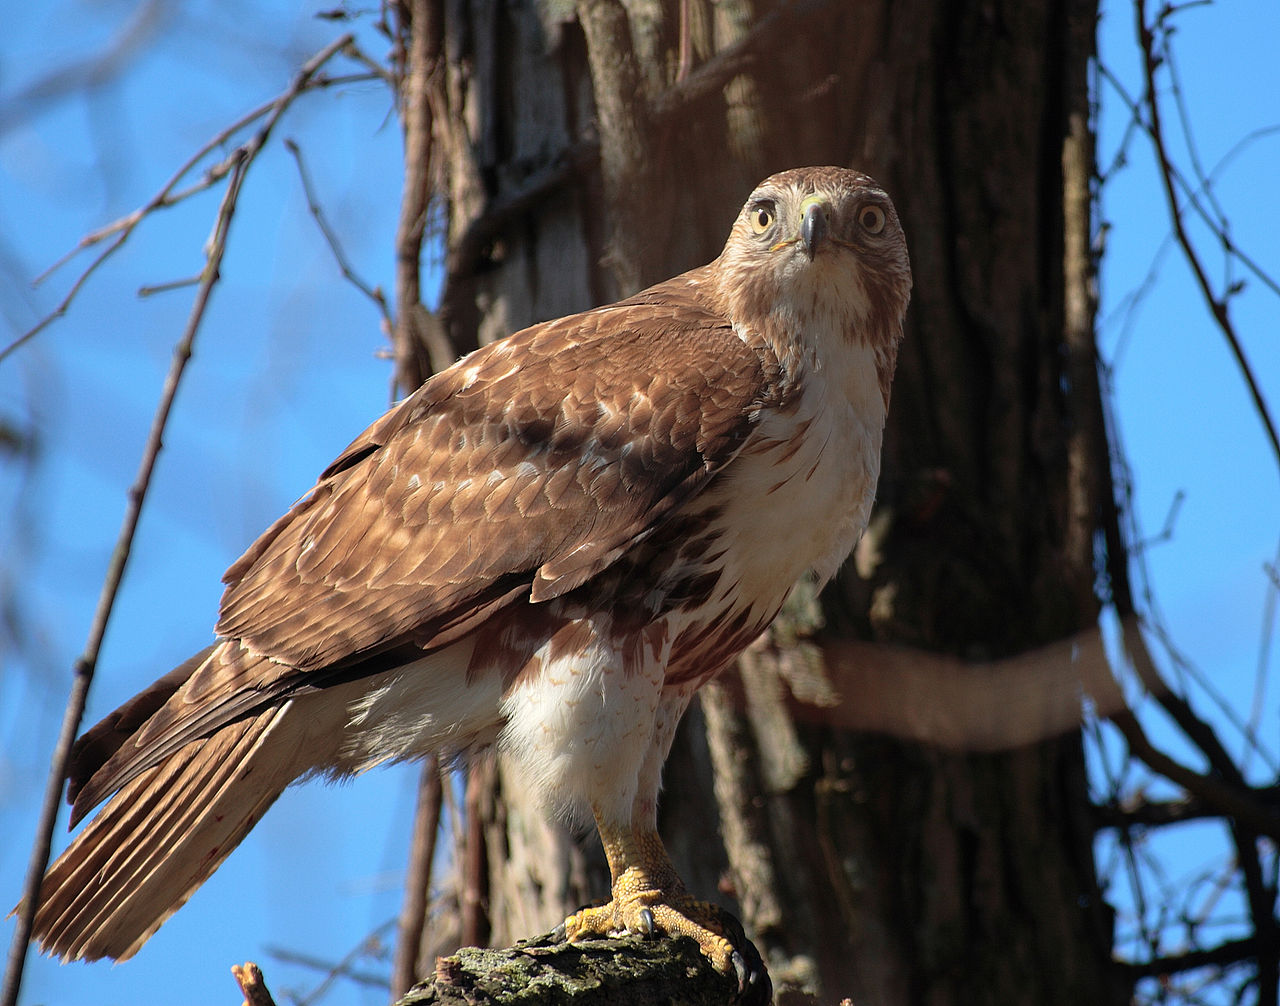

* [Sharp-shinned hawk](https://en.wikipedia.org/wiki/Sharp-shinned_hawk)

<img src="Image/sharp-shined-hawk.jpeg" alt="Drawing" style="width: 500px;"/>
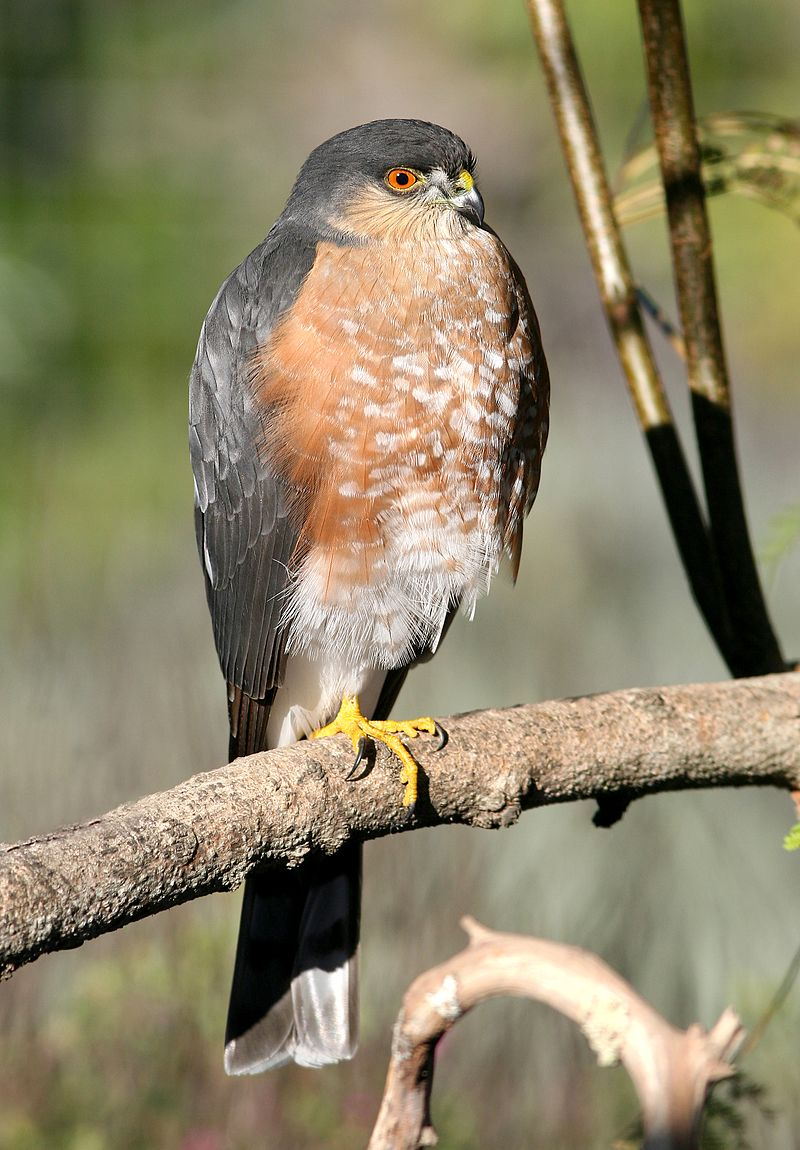

* [Cooper's hawks](https://en.wikipedia.org/wiki/Cooper%27s_hawk)

<img src="Image/cooper-hawk.jpeg" alt="Drawing" style="width: 500px;"/>
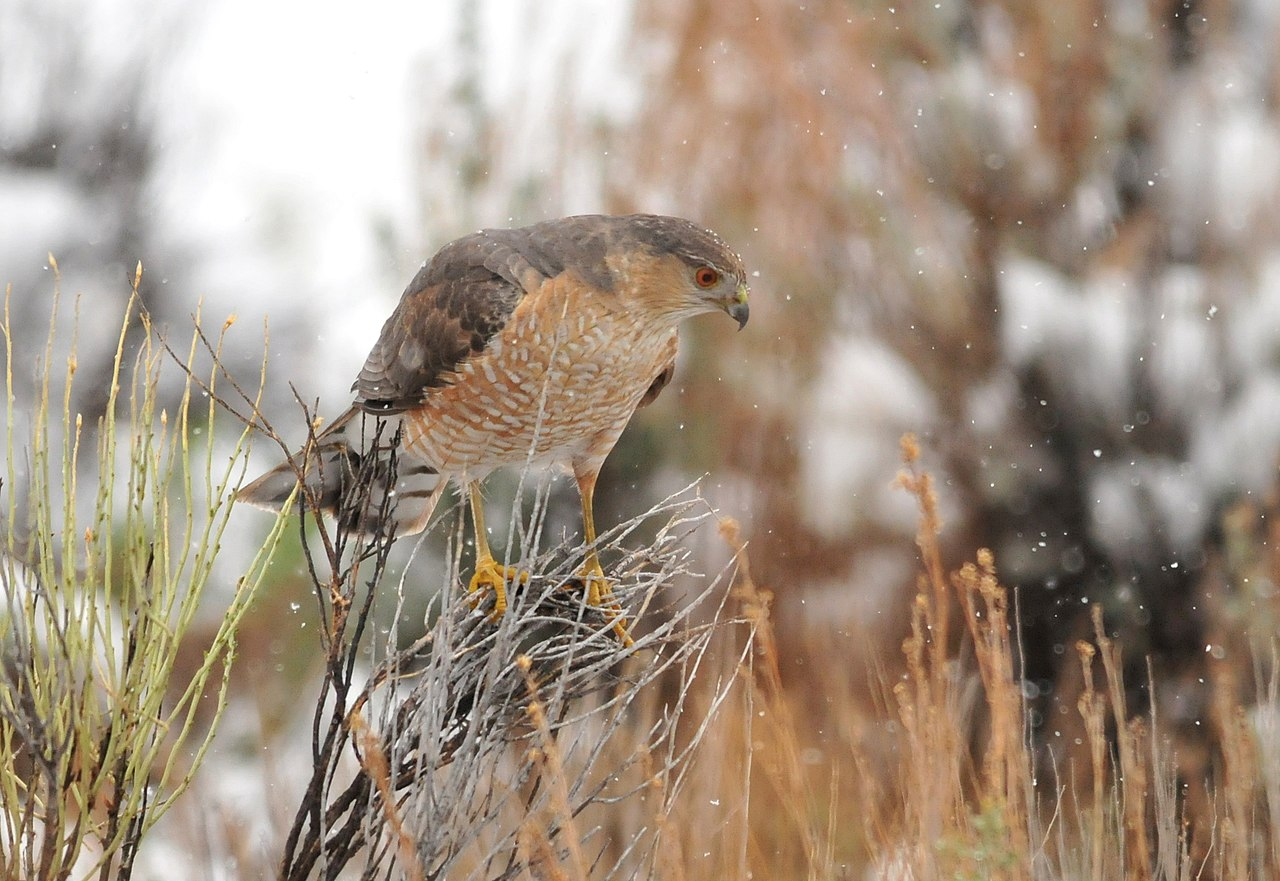

### Objective

To classify Hawk species (CH = Cooper's, RT = Red-tailed, and SS = Sharp-Shinned) using feature measures. 

To achieve the objective, I plot the overall scatter points between some of the feature measures (Wing, Weight, Culmen, Hallux, and Tail) to select the predictors. 

Next, to implement KNN, I define the following functions:

* **distance**: calculate the Euclidean distance between two points
* **k_nearest_neighbors**: find the k nearest points
* **KNN_Predict**: predict the majority vote of the k closest neighbors for classification (regression == False) or to predict the average label for the K closest neighbors for regression (regreesion == True)
* **classification_error**: calculate classification error
* **get_accuracy**: calculate the accuracy


The algorithm results are compared with the results with *KNeighborsClassifier* function in sklearn package.

The following libraries are used in this notebook:

* [matplotlib](http://metplotlib.org)
* [pandas](http://pandas.pydata.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [itertools](https://docs.python.org/3/library/itertools.html)
* [seaborn](https://seaborn.pydata.org/)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) in [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) in [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)


In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

---

### Data Understanding and Data Wrangling

In [2]:
# Import Hawks dataset
hawks = pd.read_csv("Data/Hawks.csv")

In [3]:
hawks.head()

,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove the NaN values in the five features that are used from the dataset
hawks = hawks.dropna(subset = ['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail'])

In [5]:
hawks.shape

(891, 19)

After removing the NaN values from the dataset, the dataset has 891 rows and 19 columns.

I use the following columns: 

* Species: CH=Cooper's, RT=Red-tailed, SS=Sharp-Shinned
* Wing: Length (in mm) of primary wing feather from tip to wrist it attaches to
* Weight: Body weight (in gm)
* Culmen: Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird
* Hallux: Length (in mm) of the killing talon
* Tail: Measurement (in mm) related to the length of the tail (invented at the MacBride Raptor Center)


The scatter plot of the distributution 

Text(0.5, 1.0, 'Hawks Species Data')

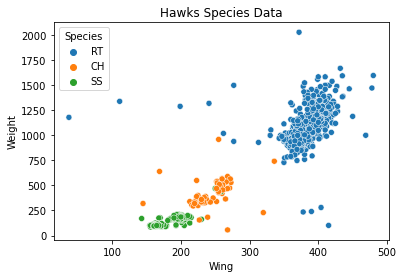

In [6]:
sns.scatterplot(data = hawks, x = "Wing", y = "Weight", hue = 'Species').set_title("Hawks Species Data")

Text(0.5, 1.0, 'Hawks Species Data')

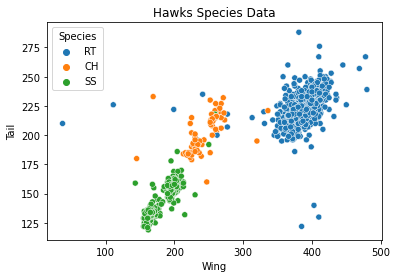

In [7]:
sns.scatterplot(data = hawks, x = "Wing", y = "Tail", hue = 'Species').set_title("Hawks Species Data")

To have a more intuitive view of the data, generate scatter plots between for any 2 features I am interested in.

In [8]:
# Get pairwise features list of the dataset
pick_features = hawks.columns[9:14]
L = list(x for x in combinations(pick_features, 2))

In [9]:
# Check the list of pairwise features
L

[('Wing', 'Weight'),
 ('Wing', 'Culmen'),
 ('Wing', 'Hallux'),
 ('Wing', 'Tail'),
 ('Weight', 'Culmen'),
 ('Weight', 'Hallux'),
 ('Weight', 'Tail'),
 ('Culmen', 'Hallux'),
 ('Culmen', 'Tail'),
 ('Hallux', 'Tail')]

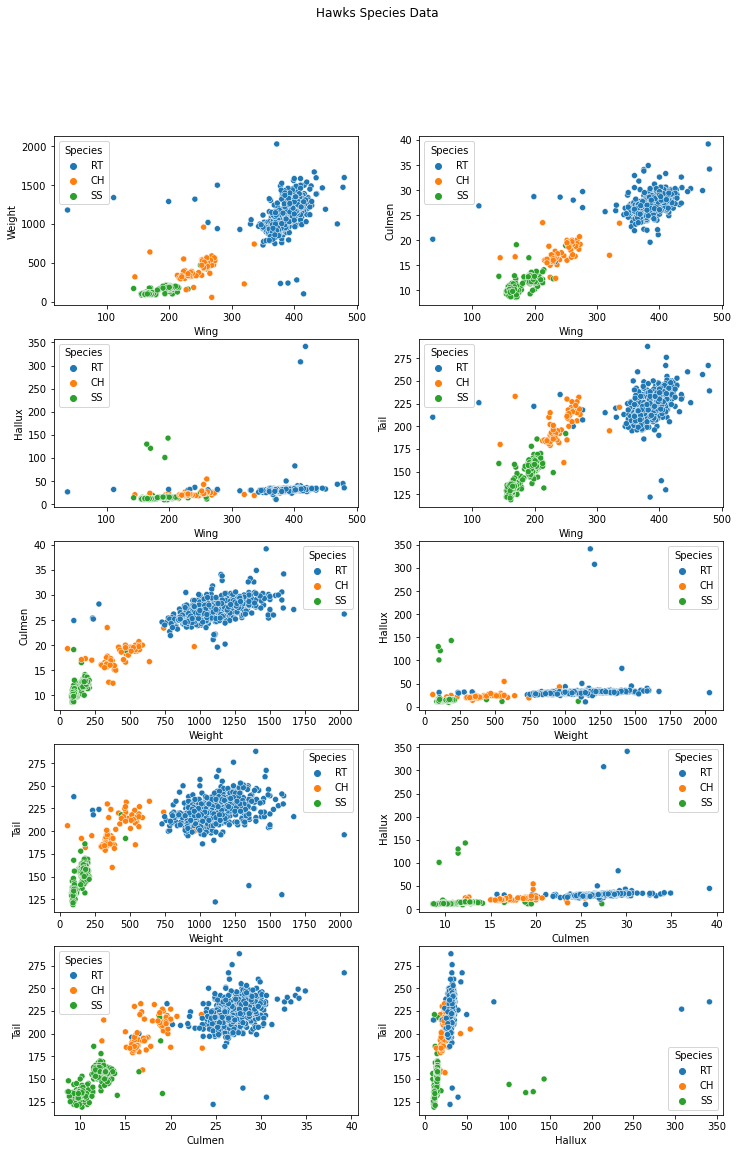

In [10]:
# Plot an overall scatter points between any 2 feature measures
fig, ax = plt.subplots(nrows = 5, 
                       ncols = 2,
                       figsize = (12, 18))

for p, q in zip(L, [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1)]):
    sns.scatterplot(data = hawks, x = p[0] , y = p[1], hue = 'Species', ax = ax[q])

fig.suptitle('Hawks Species Data')
plt.show()

**Inference**: From the above scatter plots, Wing vs. Tail classify the data into three classes. And thus, I **choose Wing and Tail as the features** to predict the classification of Hawks species.

---

### Train and Test Data Split

In [11]:
# Extract out desired features from Hawks Dataset, and covert features to numpy array
X = hawks[['Wing',
           'Tail']].to_numpy()

# Extract out labels, and convert labels to numpy array
y = hawks['Species'].to_numpy()

In [12]:
# Use the train_test_split function in sklearn package
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 20) # like set.seed in R

---

### Define the functions for KNN algorithm:

In [13]:
# Calculate the Euclidean distance between two points
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [14]:
# Find the k nearest points
def k_nearest_neighbors(point,
                        training_features,
                        training_labels,
                       k):
    neighbors = []
    # Calculate all the distance between the predict point and training data points
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
    
    # Sort the distances from smallest to the largest
    neighbors.sort(key = lambda x :x[-1])
    
    # Output the first K points with the smallest distances
    return neighbors[:k]

In [15]:
# Count the labels and predict
def KNN_Predict(point,
                training_features,
                training_labels,
                k,
                regression = False):
    
    # Find the k nearest points
    neighbors = k_nearest_neighbors(point,
                                    training_features,
                                    training_labels,
                                    k)
    
    # for classification, output the majority label of the k closest points 
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    # for regression, output the average label for the K closest points
    else:
        return sum([x[1] for x in neighbors])/k

In [16]:
# Calculate the error for classification
def classification_error(test_features,
                         test_labels,
                         training_features,
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point,
                                               training_features,
                                               training_labels,
                                               k)
    return error/len(test_labels)

In [17]:
# Calculate the accuracy
def get_accuracy(test_features,
                 test_labels,
                 training_features,
                 training_labels,
                 k):                        
    correct = 0
    for i in range(len(test_features)):
        point = test_features[i]
        true_label = test_labels[i]
        predicted_label_euclidean = KNN_Predict(point,
                                                training_features,
                                                training_labels,
                                                k)
        if predicted_label_euclidean == true_label:
            correct += 1
    
    accuracy_euclidean = (correct / len(test_features)) * 100
    
    print("Model accuracy with Euclidean Distance is %.2f" %(accuracy_euclidean), "%.")

In [18]:
# Test the accuracy function
get_accuracy(X_test, y_test, X_train, y_train, k=3)

Model accuracy with Euclidean Distance is 95.93 %.


In [19]:
# Test the error function
classification_error(X_test, y_test, X_train, y_train, 3)

0.04067796610169491

From the output results of the accuracy function and the error function, the sum of the results equal to 1, suggesting that these function work.

---

### Implement the KNN algorithm:

#### Find a suitable K value:

In [20]:
# Set a list of k values to
possible_k = [x for x in range(3, 50, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train,
                               k) for k in possible_k]

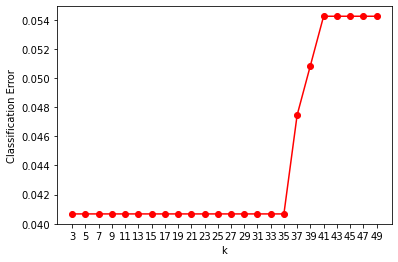

In [21]:
# Derive a plot between error rate and K
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

**Inference**: From the curve above, k = 3 to k = 35 have the same error rates, and the error rate increase when k > 35. Considering the size of the Hawks dataset and the prediction cost of both the time and memory, I choose k = 5 as the best k value.

In [22]:
# Implement our KNN algorithm for classification in the test dataset
predicted_labels = [KNN_Predict(point,
                                X_train,
                                y_train,
                                5) for point in X_test]

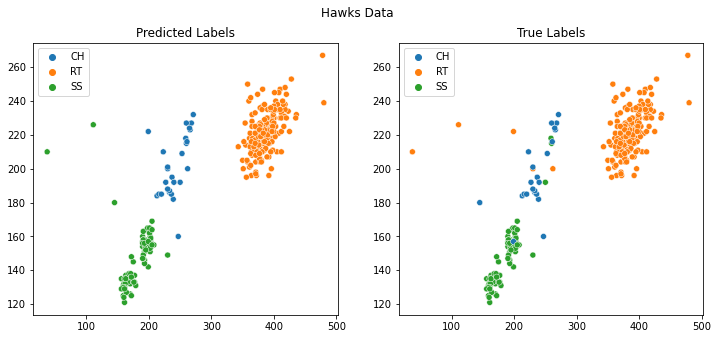

In [23]:
# Plot the predicted labels and the provided true labels
fig, ax = plt.subplots(ncols = 2,
                       figsize = (12, 5))

sns.scatterplot(x = X_test[:, 0], y = X_test[:, 1], hue = predicted_labels, ax = ax[0]).set_title("Predicted Labels")
sns.scatterplot(x = X_test[:, 0], y = X_test[:, 1], hue = y_test, ax = ax[1]).set_title("True Labels")

fig.suptitle('Hawks Data')
plt.show()

Compare the 2 scatter plots above, model does a good job of approximately predicting the all true labels. The accuracy and the error rate of model are:

In [24]:
# Calculate the accuracy
get_accuracy(X_test, y_test, X_train, y_train, k=7)

# Calculate the error rate
classification_error(X_test, y_test, X_train, y_train, 7)

Model accuracy with Euclidean Distance is 95.93 %.


0.04067796610169491

In **conclusion**, the model has 95.93% accuracy with k = 5. Thus, the features, Wing (length (in mm) of primary wing) and Tail (Measurement (in mm) related to the length of the tail) provides accurate prediction of the hawks species. 

---

### Use the *KNeighborsClassifier* in sklearn package to perform KNN algorithm and validate my algorithm:

In [25]:
# Extract out desired features from Hawks Dataset, and covert features to numpy array
X = hawks[['Wing',
           'Tail']].to_numpy()

# Extract out labels, and convert labels to numpy array
y = hawks['Species'].to_numpy()

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 20) # like seed in R

In [26]:
# Implement KNeighborsClassifier in sklearn
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

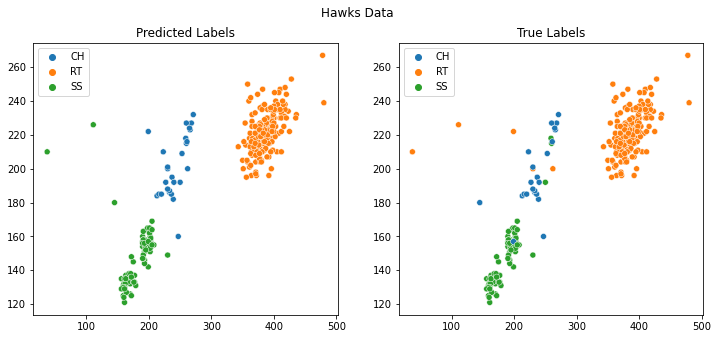

In [27]:
# Plot the predicted labels and the provided true labels
fig, ax = plt.subplots(ncols = 2,
                       figsize = (12, 5))

sns.scatterplot(x = X_test[:, 0], y = X_test[:, 1], hue = neigh.predict(X_test), ax = ax[0]).set_title("Predicted Labels")
sns.scatterplot(x = X_test[:, 0], y = X_test[:, 1], hue = y_test, ax = ax[1]).set_title("True Labels")

fig.suptitle('Hawks Data')
plt.show()

The results from KNN algorithm are similar to the naive KNN algorithm suggests that the naive algorithm works well for prediction. 

---

### Conclusion

* We can use the features, Wing (length (in mm) of primary wing) and Tail (Measurement (in mm) related to the length of the tail) to classify the hawks species. The accuracy is 95.93% when k = 5. 

* Naive KNN algorithm works well!